# CLustering is the ML unsupervised methods,used to group the data based on similaries in the data - Hierarchial clustering 

# Hierarchial clustering

In [1]:
# similar records will be clubbed together 
# DO EDA process - not mandatory(few are mandatory)
# scale the data
# calculate the distance - Euclidean or manhatten
# cluster the records based on single/complete link ('least /farthest ' distance)
# divide in the clusters into 2 or 3 classes based on the requirement
# use dendogram to visualise the clustered data
#join the classes with main data

In [2]:
import os

In [3]:
os.chdir('G:\AI&ML\ML projects\cluster analysis')

In [4]:
import pandas as pd

In [5]:
# Reading the dataset
data = pd.read_csv('segmentation data.csv',header='infer')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
data.shape

(2000, 8)

In [8]:
data.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [9]:
cor = data.corr()
cor

ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education        0.233459    0.064524         0.034732  
Income           1.000000    0.680357         0.490881  
Occupation       0.680357    1.000000         0.571795  
Settlement size  0.490881    0.571795         1.000000

In [10]:
import seaborn as sns

<AxesSubplot:>

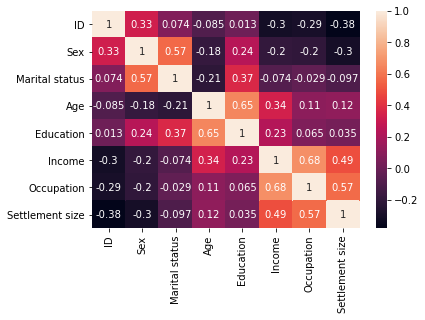

In [11]:
sns.heatmap(cor,annot=True)

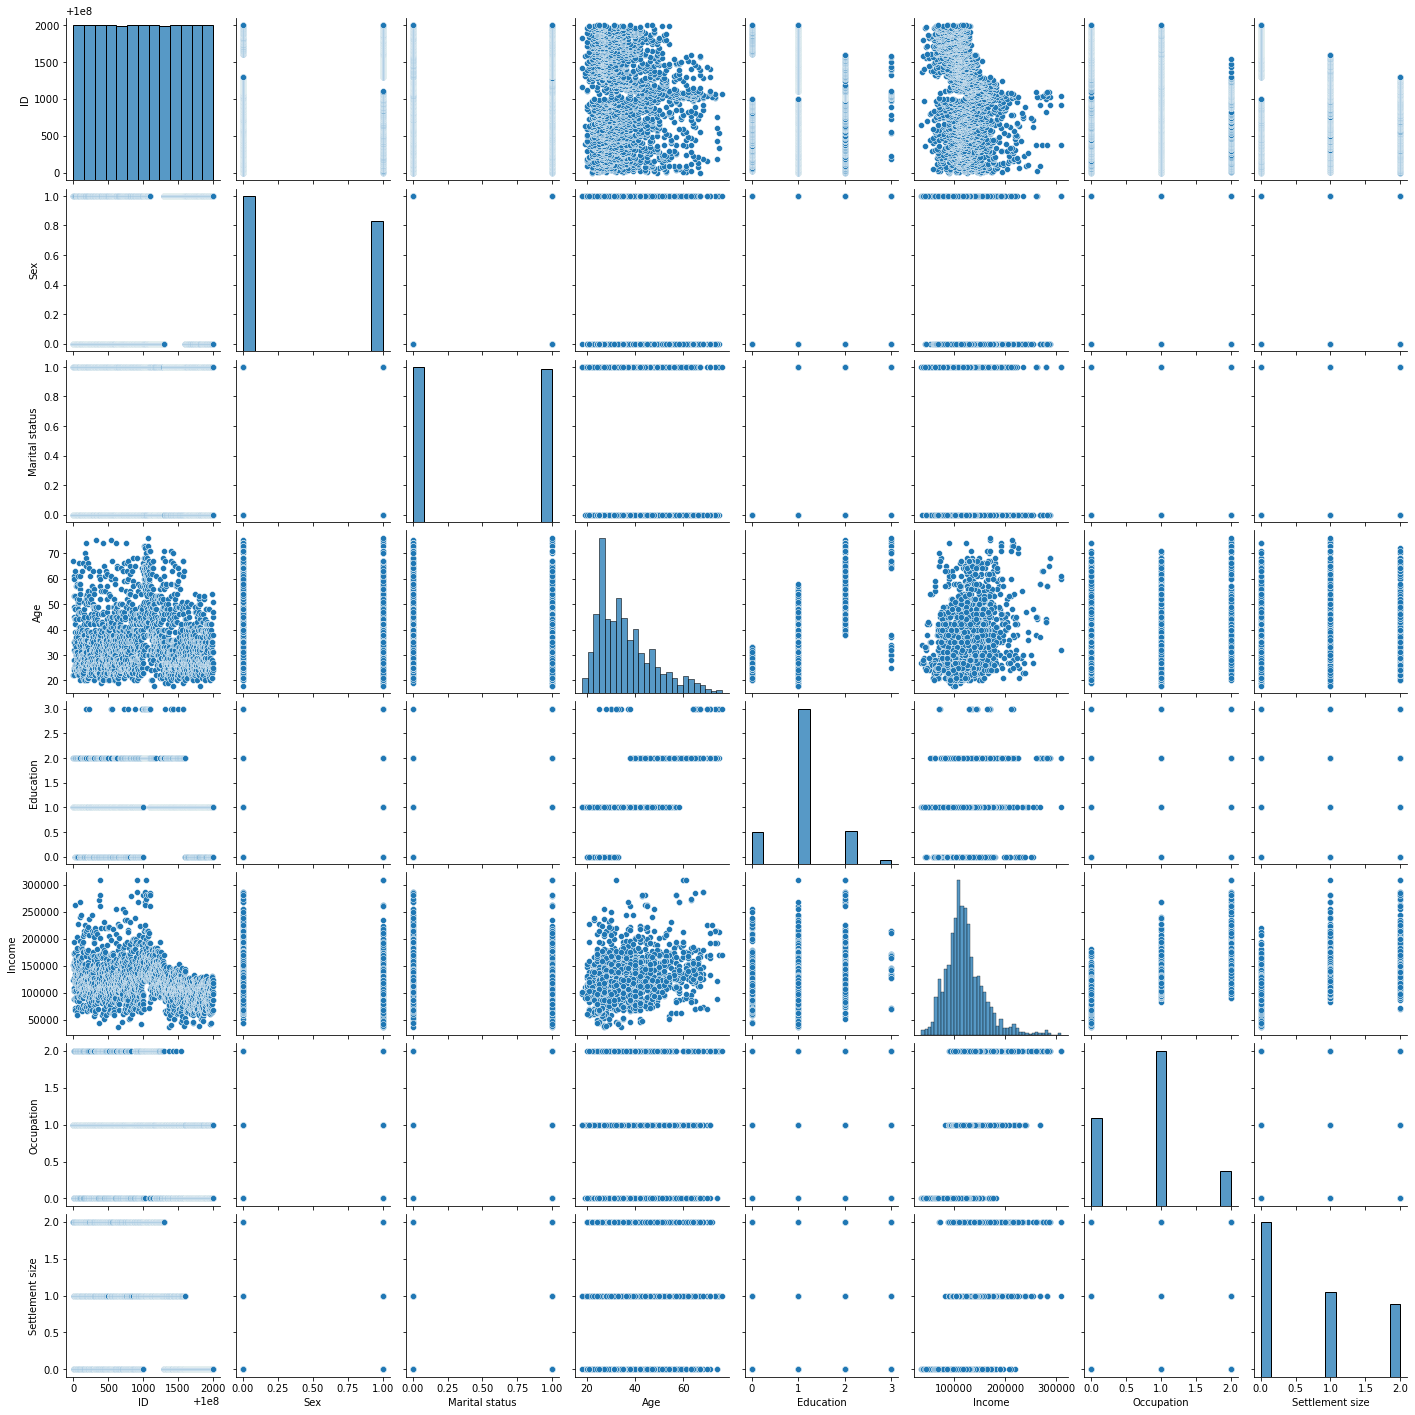

In [12]:
sns.pairplot(data)

In [11]:
data.drop(columns=['ID'],axis=1,inplace=True)

In [12]:
data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [13]:
names = data.columns

In [16]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [14]:
from sklearn import preprocessing

In [15]:
data = preprocessing.minmax_scale(data,feature_range=(0,1))  #scaling the data

In [16]:
data

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [17]:
data = pd.DataFrame(data,columns=names) #scaled data will convert to array,so converting to dataframe

In [18]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

In [19]:
# using dendogram to find optimal no of clusters
import scipy.cluster.hierarchy as sch
import matplotlib as plt

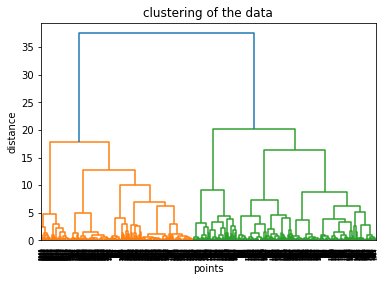

In [20]:
dendogram = sch.dendrogram(sch.linkage(data,method="ward")) # calculates euclidean distance and classfy by default
plt.pyplot.title('clustering of the data')
plt.pyplot.ylabel('distance')
plt.pyplot.xlabel('points')
plt.pyplot.show()

In [21]:
from sklearn import cluster
import sklearn as sk

In [22]:
clus = cluster.AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
clus

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [23]:
clus.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
abc = clus.fit_predict(data)

In [25]:
hclusdata = pd.DataFrame(data,pd.Series(abc))

# Creating a labled data with the help of clustering model 

In [26]:
hclusdata['clus']= pd.Series(abc)

In [27]:
hclusdata.head()

Sex  Marital status       Age  Education    Income  Occupation  \
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   

   Settlement size  clus  
1              1.0     0  
0              1.0     1  
1              1.0     0  
1              1.0     0  
1              1.0     0

In [72]:
y = hclusdata['clus']
x = hclusdata.drop(columns=['clus'],axis=1)

# splitting the test and train data

In [29]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
print(x_train.shape)
print(x_test.shape)

(1400, 7)
(600, 7)


# Applying supervised learning on the data

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

In [76]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

In [77]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

[10:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SmartbridgePC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [51]:
from sklearn import metrics

In [79]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

1.0
1.0
1.0


In [53]:
metrics.confusion_matrix(pred,y_train)

array([[579,   0],
       [  0, 821]], dtype=int64)

# K-means clustering

In [54]:
from scipy import spatial

In [56]:
wcss = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(hclusdata)
    wcss.append(kmeans.inertia_)

<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct c

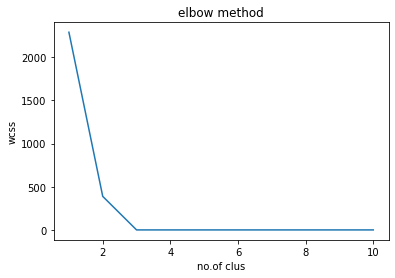

In [57]:
plt.pyplot.plot(range(1,11),wcss)
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no.of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [58]:
km_model = cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [60]:
ykmeans = km_model.fit_predict(data)

In [61]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

In [62]:
data['kclus'] = pd.Series(ykmeans)

In [63]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  kclus  
0              1.0      2  
1              1.0      1  
2              0.0      0  
3              0.5      2  
4              0.5      2

In [81]:
y = data['kclus']
x = data.drop(columns=['kclus'],axis=1)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [83]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

In [84]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

C:\Users\SmartbridgePC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [86]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.995
0.9983333333333333
0.9883333333333333


# Saving the model

In [80]:
import pickle

In [87]:
pickle.dump(xgb_model,open("xgbmodel.pkl",'wb'))

In [88]:
pwd

'G:\\AI&ML\\ML projects\\cluster analysis'